In [162]:
pip install yfinance

## Importing the dataset

In [163]:
import yfinance as yf

# Define the ticker symbol for crude oil
ticker_symbol = "GC=F"

# Set the start and end date for the data
date_start = "1950-01-01"
data_end = "2023-08-26"

# Fetch the data from Yahoo Finance
gold_data = yf.download(ticker_symbol,   period='max',  interval='1d')
new_index = gold_data.index.strftime('%Y-%m-%d')
gold_data.index = new_index
gold_data.index.name = 'Date'
gold_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-30,273.90,273.90,273.90,273.90,273.90,0
2000-08-31,274.80,278.30,274.80,278.30,278.30,0
2000-09-01,277.00,277.00,277.00,277.00,277.00,0
2000-09-05,275.80,275.80,275.80,275.80,275.80,2
2000-09-06,274.20,274.20,274.20,274.20,274.20,0
...,...,...,...,...,...,...
2023-08-22,1894.60,1896.80,1892.80,1896.40,1896.40,46
2023-08-23,1909.60,1918.50,1909.60,1918.50,1918.50,547
2023-08-24,1920.00,1920.80,1918.20,1918.20,1918.20,337


# Common functions

In [164]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred):
    """
    Calculate Mean Absolute Percentage Error (MAPE).

    Parameters:
        y_true (array-like): The ground truth (actual) values.
        y_pred (array-like): The predicted values.

    Returns:
        float: The mean absolute percentage error (MAPE) value.
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100


In [165]:
import numpy as np

def mean_square_error(y_true, y_pred):
    """
    Calculate Mean Square Error (MSE).

    Parameters:
        y_true (array-like): The ground truth (actual) values.
        y_pred (array-like): The predicted values.

    Returns:
        float: The mean square error (MSE) value.
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((y_true - y_pred) ** 2)


In [166]:
import math
from sklearn.metrics import mean_squared_error

def root_mean_square_error(y_true, y_pred):
    RMSE_Value = math.sqrt(mean_squared_error(y_true, y_pred))
    return RMSE_Value

# Data Explore

In [167]:
gold_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5768.00,5768.00,5768.00,5768.00,5768.00,5768.00
mean,1095.52,1100.99,1089.73,1095.43,1095.43,4301.08
std,524.22,527.18,521.06,524.16,524.16,24460.57
min,255.00,256.10,255.00,255.10,255.10,0.00
25%,597.65,603.00,597.22,597.68,597.68,20.00
50%,1214.45,1220.50,1208.00,1214.45,1214.45,103.00
75%,1499.93,1507.35,1490.38,1499.55,1499.55,393.25
max,2053.60,2072.00,2040.00,2051.50,2051.50,386334.00


In [168]:
gold_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [169]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5768 entries, 2000-08-30 to 2023-08-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5768 non-null   float64
 1   High       5768 non-null   float64
 2   Low        5768 non-null   float64
 3   Close      5768 non-null   float64
 4   Adj Close  5768 non-null   float64
 5   Volume     5768 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 315.4+ KB


In [170]:
import pandas as pd
gold_data = gold_data.reset_index()
gold_data
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

## Data Visualization

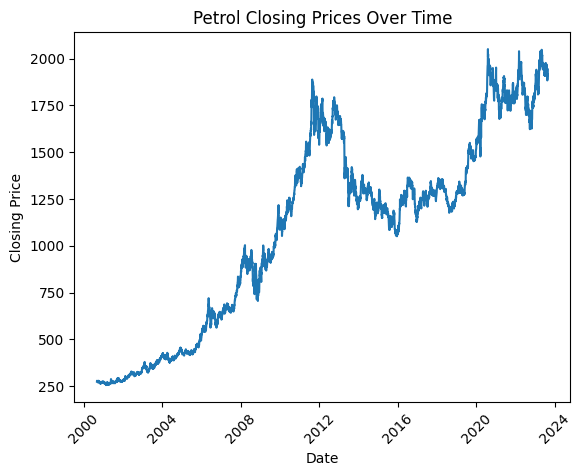

In [171]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Plotting the closing prices
plt.plot(gold_data['Date'] ,gold_data['Close'])
plt.title("Petrol Closing Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
#plt.xticks([])
plt.xticks(rotation=45)
plt.savefig('closing price')
plt.show()

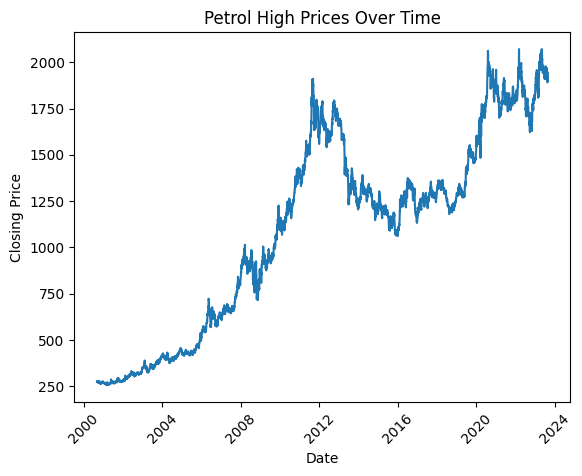

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting the High prices
plt.plot(gold_data['Date'] ,gold_data['High'])
plt.title("Petrol High Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price")
#plt.xticks([])
plt.xticks(rotation=45)
plt.savefig('High price')
plt.show()

In [173]:
gold_data.value_counts()

Date        Open     High     Low      Close    Adj Close  Volume
2000-08-30  273.90   273.90   273.90   273.90   273.90     0         1
2016-01-13  1081.50  1093.90  1081.50  1087.50  1087.50    50        1
2016-01-11  1105.70  1107.90  1096.50  1096.50  1096.50    43        1
2016-01-08  1111.10  1111.10  1093.00  1097.80  1097.80    98        1
2016-01-07  1091.60  1109.40  1091.60  1107.70  1107.70    122       1
                                                                    ..
2008-05-13  862.90   870.40   862.90   868.50   868.50     17        1
2008-05-12  879.20   886.50   879.20   883.70   883.70     56        1
2008-05-09  883.90   884.70   883.90   884.50   884.50     25        1
2008-05-08  871.00   883.30   867.10   880.60   880.60     71        1
2023-08-27  1944.00  1944.40  1942.30  1942.60  1942.60    728       1
Length: 5768, dtype: int64

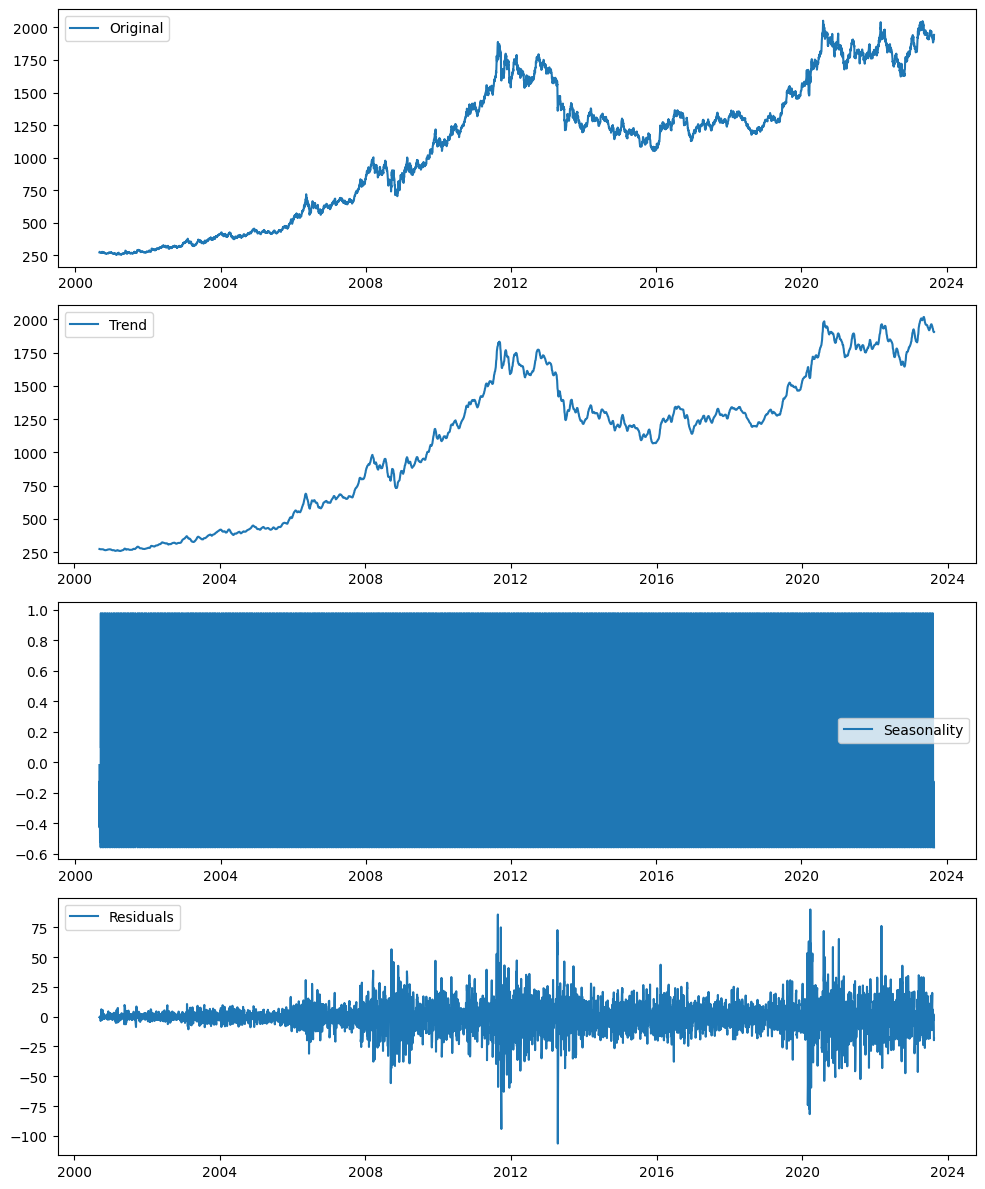

In [174]:
from statsmodels.tsa.seasonal import seasonal_decompose
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
gold_data.set_index('Date', inplace=True)

# Perform seasonal decomposition
decomposition = seasonal_decompose(gold_data['Close'], period=12)

# Plot the trend, seasonal, and residual components
plt.figure(figsize=(10, 12))
plt.subplot(411)
plt.plot(gold_data['Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')

# Adjust subplot spacing
plt.tight_layout()
plt.savefig('component of time series anaysis')
# Display the plot
plt.show()

In [175]:
rollmean = gold_data.rolling(window=12).mean()
rolstd = gold_data.rolling(window=12).std()
print(rollmean,rolstd)

              Open    High     Low   Close  Adj Close  Volume
Date                                                         
2000-08-30     NaN     NaN     NaN     NaN        NaN     NaN
2000-08-31     NaN     NaN     NaN     NaN        NaN     NaN
2000-09-01     NaN     NaN     NaN     NaN        NaN     NaN
2000-09-05     NaN     NaN     NaN     NaN        NaN     NaN
2000-09-06     NaN     NaN     NaN     NaN        NaN     NaN
...            ...     ...     ...     ...        ...     ...
2023-08-22 1910.47 1913.07 1902.88 1905.78    1905.78  245.33
2023-08-23 1907.86 1911.19 1901.19 1904.53    1904.53  259.58
2023-08-24 1906.88 1910.16 1900.79 1904.04    1904.04  241.42
2023-08-25 1906.42 1909.41 1900.58 1903.68    1903.68  231.92
2023-08-27 1908.33 1910.79 1903.15 1906.03    1906.03  277.75

[5768 rows x 6 columns]             Open  High   Low  Close  Adj Close  Volume
Date                                                  
2000-08-30   NaN   NaN   NaN    NaN        NaN     NaN
2000

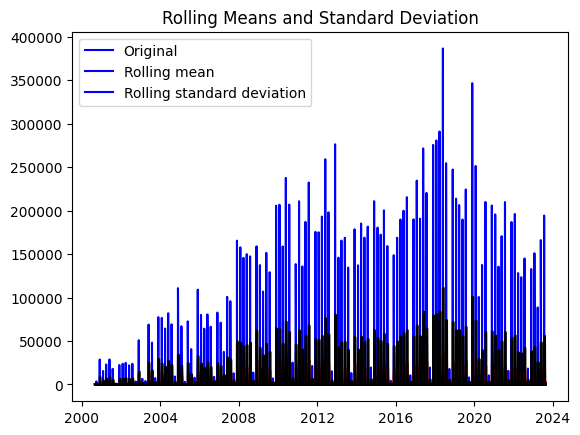

In [176]:
import matplotlib.pyplot as plt
orig = plt.plot(gold_data, color='blue', label='Original')
mean = plt.plot(rollmean, color='red', label='Rolling mean')

std = plt.plot(rolstd, color='black', label='Rolling standard deviation')

plt.legend(['Original', 'Rolling mean', 'Rolling standard deviation'], loc='best')

# Adding title
plt.title('Rolling Means and Standard Deviation')
plt.savefig('Rolling Means and Standard Deviation')
# Displaying the plot
plt.show()


## moving average

In [177]:
## Here 12 indicate moving average of 48 months and shift(1) that takes parameter 1 specify 12 months should start from last month
gold_data['mavg_12'] = gold_data['Close'].rolling(window=14).mean().shift(1)

In [178]:
## printing forecasting from 49 month
pd.set_option('display.float_format',lambda x: '%.4f' %x)
gold_data[['Close','mavg_12']][24:]

,Close,mavg_12
Date,,
2000-10-04,270.3000,272.8143
2000-10-05,270.6000,272.6643
2000-10-06,269.3000,272.5429
2000-10-09,270.1000,272.3929
2000-10-10,272.4000,272.2643
...,...,...
2023-08-22,1896.4000,1913.0000
2023-08-23,1918.5000,1910.0714
2023-08-24,1918.2000,1909.1071


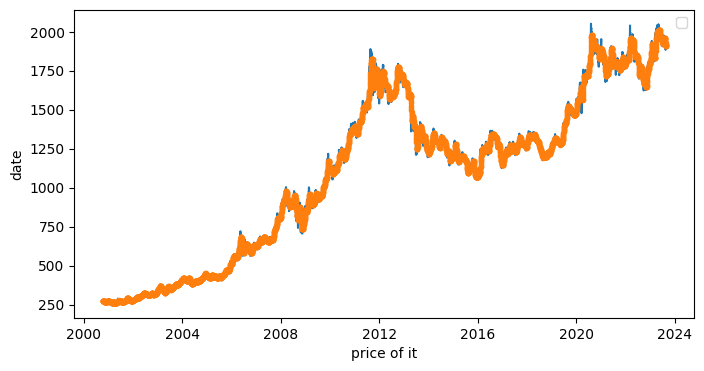

In [179]:
plt.figure(figsize=(8,4))
plt.ylabel('date')
plt.xlabel('price of it')
plt.plot(gold_data['Close'][24:]);
plt.plot(gold_data['mavg_12'][24:],'.');
plt.legend();

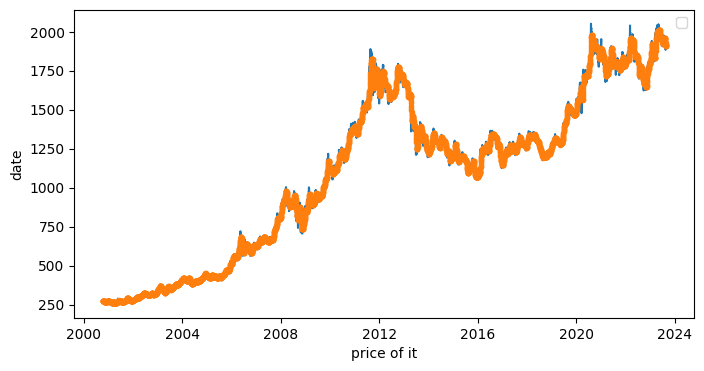

In [180]:
plt.figure(figsize=(8,4))
plt.ylabel('date')
plt.xlabel('price of it')
plt.plot(gold_data['Close'][24:]);
plt.plot(gold_data['mavg_12'][24:],'.');
plt.legend();

In [181]:
import numpy as np
def get_mape(actual,predicted):
  y_true, y_pred = np.array(actual), np.array(predicted)
  return np.round(np.mean(np.abs((actual-predicted)/actual))*100,2)

In [182]:
get_mape(gold_data['mavg_12'][24:].values,gold_data['Close'][24:].values)

1.84

In [183]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(gold_data['mavg_12'][24:].values,gold_data['Close'][24:].values))

28.38407758490722

## exponential smoothing

In [184]:
# Create a new DataFrame 'gold_data2' and copy values from 'gold_data'
gold_data2 = gold_data.copy()

# Now you can perform operations on 'gold_data2' without affecting 'gold_data'
gold_data2['ewm'] = gold_data2['Close'].ewm(alpha=0.2).mean()

In [185]:
pd.options.display.float_format = '{:.2f}'.format

In [186]:
get_mape(gold_data2['ewm'][24:].values,gold_data2['Close'][24:].values)

1.07

In [187]:
np.sqrt(mean_squared_error(gold_data2['ewm'][24:].values,gold_data2['Close'][24:].values))

16.827199627270282

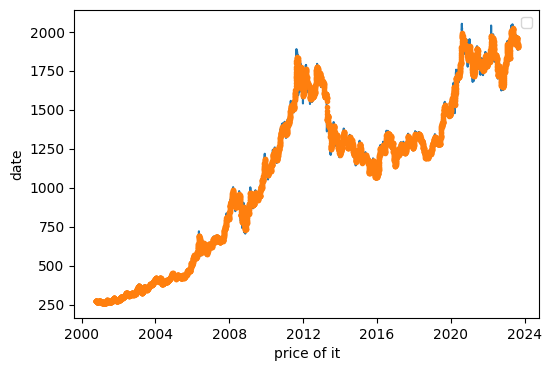

In [188]:
plt.figure(figsize=(6,4))
plt.ylabel('date')
plt.xlabel('price of it')
plt.plot(gold_data2['Close'][24:]);
plt.plot(gold_data2['ewm'][24:],'.');
plt.legend();

# Stationary Check

### Performing Dickey Fuller Test

In [189]:
from statsmodels.tsa.stattools import adfuller

In [190]:
def ad_test(dataset):
    dftest = adfuller(dataset, autolag='AIC')
    print("1. ADF: ",dftest[0])
    print("2. P-value:",dftest[1])
    print("3.No of Lags",dftest[2])
    print("4.The number of observations utilised for ADF Calculation of regression and critical values",dftest[3])
    print("5.crtical value:")
    for key, val in dftest[4].items():
        print("\t",key,":",val)

In [191]:
ad_test(gold_data["Close"])

1. ADF:  -0.8350581782507714
2. P-value: 0.8086065090042382
3.No of Lags 11
4.The number of observations utilised for ADF Calculation of regression and critical values 5756
5.crtical value:
	 1% : -3.431486591149895
	 5% : -2.8620422649042356
	 10% : -2.567037353720033


In [192]:
## If the p-value is larger than or equal to the significance level, we fail to reject the null hypothesis and deem the data non-stationary.

## In our situation, the p-value is 0.05073763053655805. We cannot reject the null hypothesis at the 5% significance level since the p-value is somewhat larger than 0.05.

<Axes: xlabel='Date'>

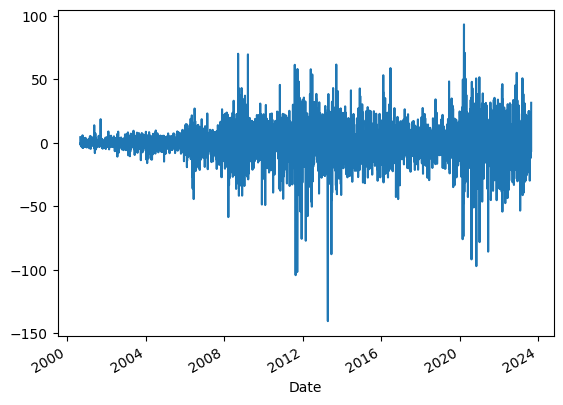

In [193]:
gold_data["Close"].diff(1).dropna().plot()

In [194]:
ad_test(gold_data["Close"].diff(1).dropna())

1. ADF:  -23.718116236041368
2. P-value: 0.0
3.No of Lags 10
4.The number of observations utilised for ADF Calculation of regression and critical values 5756
5.crtical value:
	 1% : -3.431486591149895
	 5% : -2.8620422649042356
	 10% : -2.567037353720033


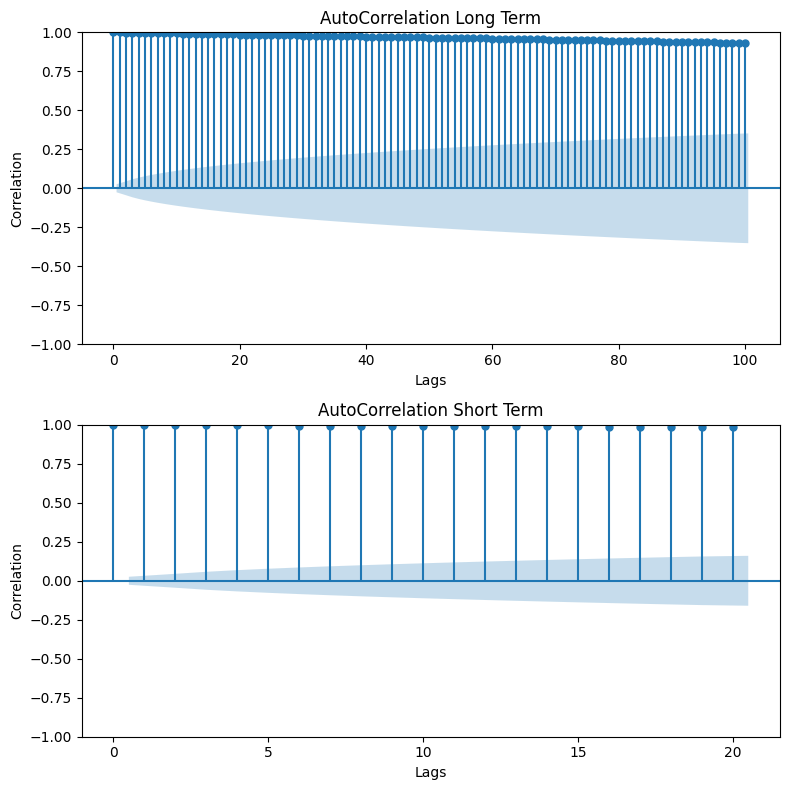

In [195]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, figsize=(8,8))

# Plotting auto-correlation for long term (lags=180)
acf_long_term = plot_acf(gold_data['Close'], lags=100, ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')

# Plotting auto-correlation for short term (lags=30)
acf_short_term = plot_acf(gold_data['Close'], lags=20, ax=ax2)
ax2.set_title('AutoCorrelation Short Term')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

plt.tight_layout()
plt.savefig('ACF value')
# Displaying the plot
plt.show()

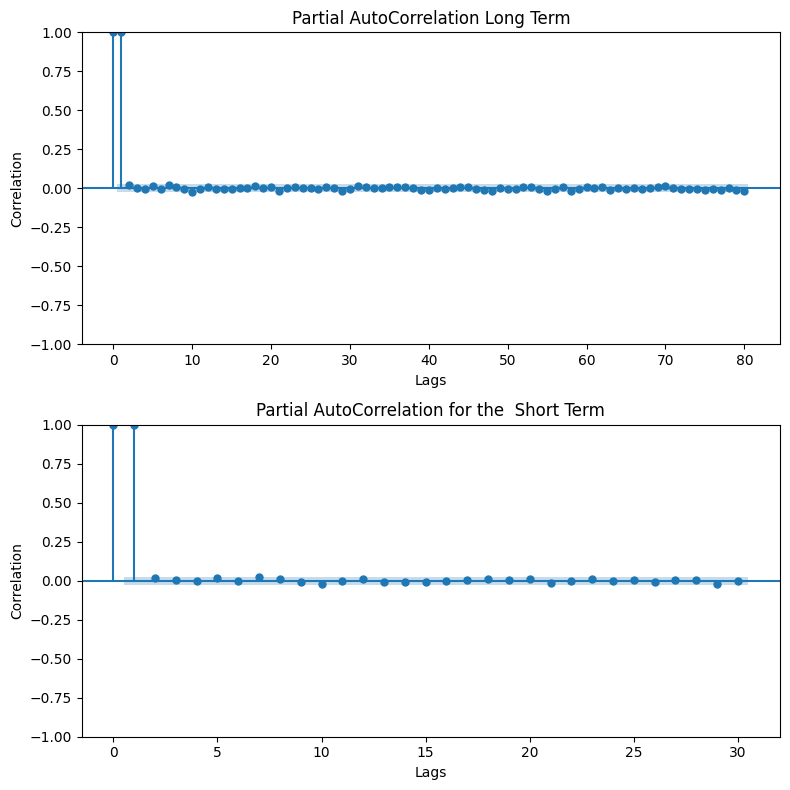

In [196]:
from statsmodels.graphics.tsaplots import plot_pacf
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 8))

# Plotting auto-correlation for long term (lags=180)
plot_pacf(gold_data['Close'], lags=80, ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')

# Plotting auto-correlation for short term (lags=30)
plot_pacf(gold_data['Close'], lags=30, ax=ax2)
ax2.set_title('Partial AutoCorrelation for the  Short Term')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

# Adjust subplot spacing
plt.tight_layout()
plt.savefig('PACF')
# Display the plot
plt.show()


In [197]:
##Differencing By 1
diff_data = gold_data["Close"].diff(1).dropna()
diff_data

Date
2000-08-31    4.40
2000-09-01   -1.30
2000-09-05   -1.20
2000-09-06   -1.60
2000-09-07   -0.20
              ... 
2023-08-22    3.10
2023-08-23   22.10
2023-08-24   -0.30
2023-08-25   -7.10
2023-08-27   31.50
Name: Close, Length: 5767, dtype: float64

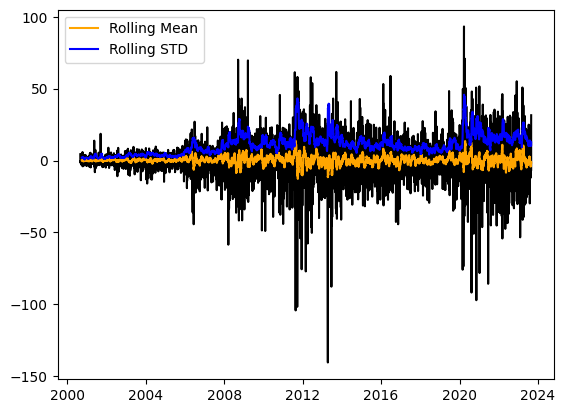

In [198]:
# Plotting the original data
plt.plot(diff_data, c='black')

# Plotting the rolling mean
plt.plot(diff_data.rolling(20).mean(), label='Rolling Mean', c='orange')

# Plotting the rolling standard deviation
plt.plot(diff_data.rolling(20).std(), label='Rolling STD', c='blue')

# Adding legend
plt.legend(prop={'size': 10})

# Displaying the plot
plt.show()

In [199]:
### now from the above graph after doing shift(1) it looks like data has become stationary and we can check it by dickey fuller test

In [200]:
##Checking if Time Series is Stationary by Running ADF Test
ad_test(diff_data)

1. ADF:  -23.718116236041368
2. P-value: 0.0
3.No of Lags 10
4.The number of observations utilised for ADF Calculation of regression and critical values 5756
5.crtical value:
	 1% : -3.431486591149895
	 5% : -2.8620422649042356
	 10% : -2.567037353720033


In [201]:
pip install pmdarima

# Splitting of data

In [202]:
from statsmodels.tsa.arima.model import ARIMA
# Define the sizes of training, testing, and validation sets
train_size = int(len(gold_data) * 0.85)  # 98% of the data for training
test_size = int(len(gold_data) * 0.1)   # 1% of the data for testing
val_size = len(gold_data) - train_size - test_size  # Remaining for validation

# Split the data into training, testing, and validation sets
train = gold_data.iloc[:train_size]
validation = gold_data.iloc[train_size: train_size + val_size]
test = gold_data.iloc[train_size + val_size:]

# Print the shapes of the split sets
print(train.shape, test.shape, validation.shape)

(4902, 7) (576, 7) (290, 7)


In [203]:
train_data = train.filter(['Close'])
train_set = train_data.values
test_data = test.filter(['Close'])
test_set = test_data.values
validation_data = validation.filter(['Close'])
validation_set = validation_data.values
train_set.shape,test_set.shape,validation_set.shape

((4902, 1), (576, 1), (290, 1))

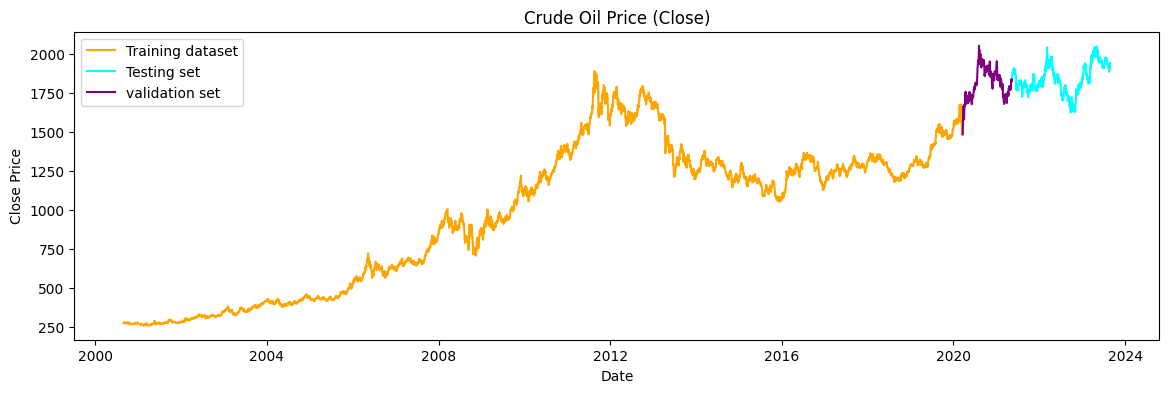

In [204]:
import matplotlib.pyplot as plt
# Plotting the training and testing sets
plt.figure(figsize=(14, 4))
plt.plot(train["Close"], color='orange')
plt.plot(test["Close"], color='cyan')
plt.plot(validation["Close"], color='purple')
plt.legend(['Training dataset', 'Testing set','validation set'])
plt.title('Crude Oil Price (Close)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.savefig('Splitting of Data')
# Save the plot
plt.show()

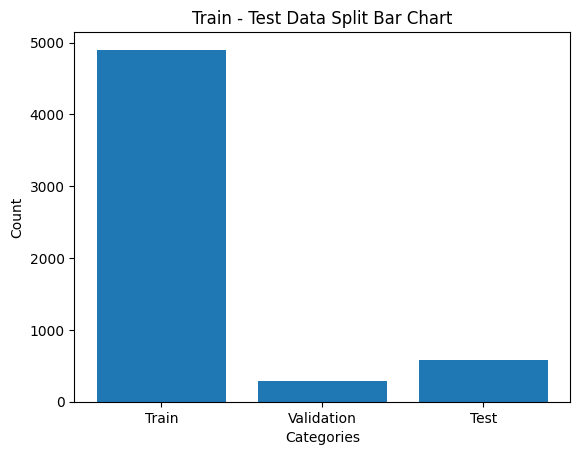

In [205]:
x = ['Train','Validation','Test']
y = [len(train), len(validation),len(test)]

plt.bar(x, y)

# Set labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Train - Test Data Split Bar Chart')
# Display the plot
plt.savefig('RNN-LSTM_Model-Train-Test-Split.png' )

# Display the plot
plt.show()

# ARIMA

## Model fitting

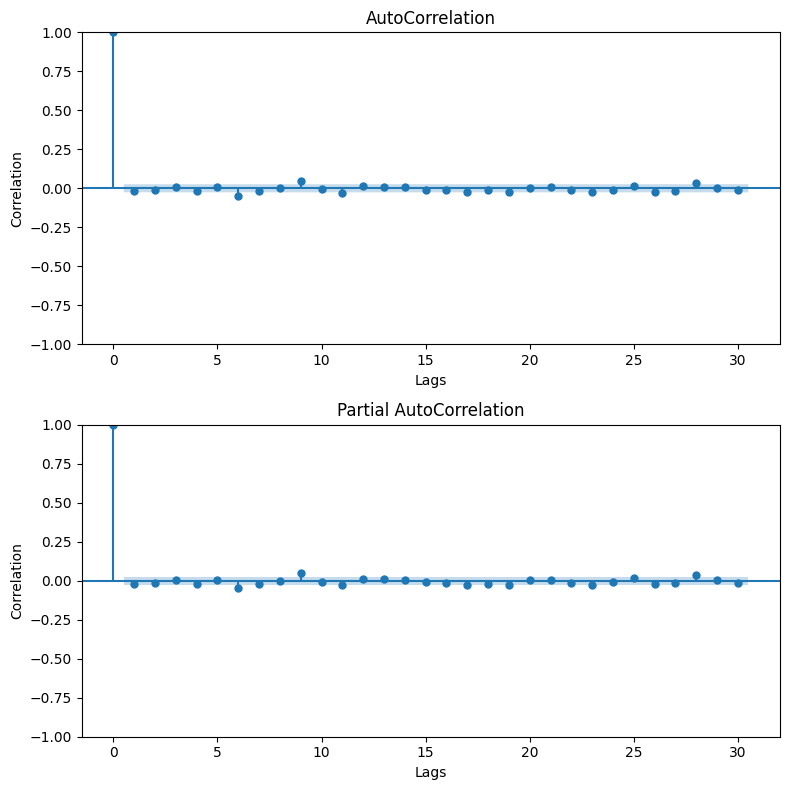

In [206]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 8))

# Plotting auto-correlation for long term (lags=180)
plot_acf(diff_data, lags=30, ax=ax1)
ax1.set_title('AutoCorrelation')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')

# Plotting auto-correlation for short term (lags=30)
plot_pacf(diff_data, lags=30, ax=ax2)
ax2.set_title('Partial AutoCorrelation')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

# Adjust subplot spacing
plt.tight_layout()

# Display the plot
plt.show()


In [207]:
from pmdarima import auto_arima
##ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
stepwise_fit = auto_arima(train["Close"], trace=True,suppress_warnings=True, seasonal=False)
print(stepwise_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=38115.917, Time=2.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=38113.073, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=38114.835, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=38114.831, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=38113.195, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=38117.071, Time=0.95 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 4.646 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4902
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -19054.536
Date:                Sun, 27 Aug 2023   AIC                          38113.073
Time:                        22:55:06   BIC                          38126.067
Sample:                             0   HQIC                         38117.632
    

In [208]:
orders= (0,1,0)
model = ARIMA(train['Close'],order=orders )
model = model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 4902
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -19055.598
Date:                Sun, 27 Aug 2023   AIC                          38113.195
Time:                        22:55:06   BIC                          38119.693
Sample:                             0   HQIC                         38115.475
                               - 4902                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       139.5374      1.075    129.800      0.000     137.430     141.644
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):             29325.89
Prob(Q):                              0.63   Pr

## ARIMA model validation

In [209]:
# Number of steps to forecast
num_forecast_steps = len(validation)

# Initialize a list to store the predictions
predictions = []

# Perform rolling predictions
for i in range(num_forecast_steps):
    # Forecast the next time step
    forecast = model.forecast(steps=1, typ='levels')
    predictions.append(forecast.item())

    # Update the model with the new observed data
    new_observation = validation.iloc[i]['Close']
    model = ARIMA(pd.concat([train['Close'], validation.iloc[:i+1]['Close']]), order=orders)
    model = model.fit()

# Convert the list of predictions to a Series
pred_series = pd.Series(predictions, index=validation.index, name='ARIMA Predictions')
# If you want to compare predictions to actual validation data
predicted_arima = pd.concat([validation['Close'], pred_series], axis=1)
print(predicted_arima)

             Close  ARIMA Predictions
Date                                 
2020-03-20 1484.00            1478.60
2020-03-23 1567.00            1484.00
2020-03-24 1660.20            1567.00
2020-03-25 1632.30            1660.20
2020-03-26 1650.10            1632.30
...            ...                ...
2021-05-07 1831.10            1815.50
2021-05-10 1837.50            1831.10
2021-05-11 1835.90            1837.50
2021-05-12 1822.60            1835.90
2021-05-13 1823.80            1822.60

[290 rows x 2 columns]


<Axes: xlabel='Date'>

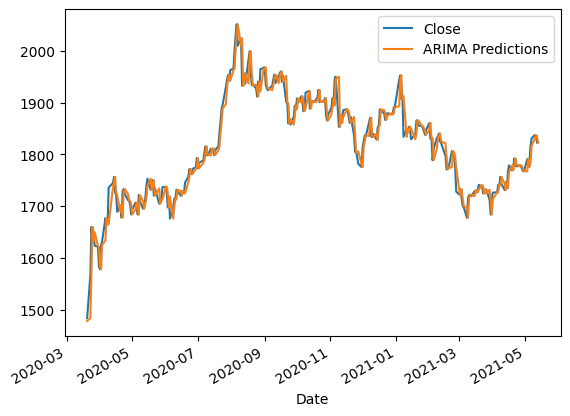

In [210]:
predicted_arima.plot()

In [211]:
mape = mean_absolute_percentage_error(predicted_arima['Close'], predicted_arima['ARIMA Predictions'])
mse = mean_square_error(predicted_arima['Close'], predicted_arima['ARIMA Predictions'])
rmse = root_mean_square_error(predicted_arima['Close'], predicted_arima['ARIMA Predictions'])

print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mape)

RMSE: 22.21007720422456
MSE: 493.28752941761553
MAE: 0.8753393699074192


## Arima Model Testing

In [212]:
model = ARIMA(train['Close'],order= orders )
model = model.fit()
pred = model.forecast(steps=len(validation) ,typ='levels')
pred = pred.rename('ARIMA Predictions')
pred.index = validation.index[:len(pred)]
print(pred.index)
model = pd.concat([train['Close'],validation['Close'],pred])
model

DatetimeIndex(['2020-03-20', '2020-03-23', '2020-03-24', '2020-03-25',
               '2020-03-26', '2020-03-27', '2020-03-30', '2020-03-31',
               '2020-04-01', '2020-04-02',
               ...
               '2021-04-30', '2021-05-03', '2021-05-04', '2021-05-05',
               '2021-05-06', '2021-05-07', '2021-05-10', '2021-05-11',
               '2021-05-12', '2021-05-13'],
              dtype='datetime64[ns]', name='Date', length=290, freq=None)


Date
2000-08-30    273.90
2000-08-31    278.30
2000-09-01    277.00
2000-09-05    275.80
2000-09-06    274.20
               ...  
2021-05-07   1478.60
2021-05-10   1478.60
2021-05-11   1478.60
2021-05-12   1478.60
2021-05-13   1478.60
Length: 5482, dtype: float64

In [213]:
model = ARIMA(pd.concat([train['Close'],validation['Close']]),order=orders)
model = model.fit()
predictions=[]

for i in range(len(test)):
    # Forecast the next time step
    forecast = model.forecast()
    predictions.append(forecast.item())
    forecast = pd.Series(forecast.item(), index=[test.index[i]])
    #print(forecast)
    model = ARIMA(pd.concat([train['Close'],validation['Close'],forecast]),order=(0,1,0))
    model = model.fit()
pred_series = pd.Series(predictions, index=test.index, name='ARIMA Predictions')
predicted_arima = pd.concat([test['Close'], pred_series], axis=1)
print(predicted_arima)

             Close  ARIMA Predictions
Date                                 
2021-05-14 1837.90            1823.80
2021-05-17 1867.50            1823.80
2021-05-18 1867.80            1823.80
2021-05-19 1881.30            1823.80
2021-05-20 1881.80            1823.80
...            ...                ...
2023-08-22 1896.40            1823.80
2023-08-23 1918.50            1823.80
2023-08-24 1918.20            1823.80
2023-08-25 1911.10            1823.80
2023-08-27 1942.60            1823.80

[576 rows x 2 columns]


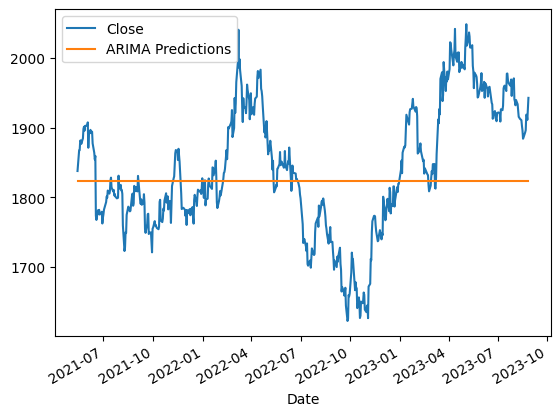

In [214]:
predicted_arima.plot()
plt.savefig('arima prediction')

In [215]:
mape = mean_absolute_percentage_error(predicted_arima['Close'], predicted_arima['ARIMA Predictions'])
mse = mean_square_error(predicted_arima['Close'], predicted_arima['ARIMA Predictions'])
rmse = root_mean_square_error(predicted_arima['Close'], predicted_arima['ARIMA Predictions'])

print("RMSE:", rmse)
print("MSE:", mse)
print("MAE:", mape)

RMSE: 94.46248376458445
MSE: 8923.160838974381
MAE: 4.1428672859408575


## Future month prediction - 6 months

In [216]:
model = ARIMA(pd.concat([train['Close'],validation['Close'], test['Close']]),order=orders)
model = model.fit()
predictions=[]
index1=[]
for i in range(6):
    # Forecast the next time step
    forecast = model.forecast()
    predictions.append(forecast.item())
    next_day = test.index[-1] + pd.DateOffset(days=i+1)
    index1.append(next_day)
    forecast = pd.Series(forecast.item(), index=[next_day])
    #print(forecast)
    model = ARIMA(pd.concat([train['Close'],validation['Close'],forecast]),order=(2,1,0))
    model = model.fit()
pred_series = pd.Series(predictions, name='ARIMA Predictions', index=index1)
predicted_arima = pd.concat([train['Close'],validation['Close'], test['Close'], pred_series])
print(pred_series)

2023-08-28   1942.60
2023-08-29   1941.02
2023-08-30   1939.47
2023-08-31   1937.93
2023-09-01   1936.41
2023-09-02   1934.92
Name: ARIMA Predictions, dtype: float64


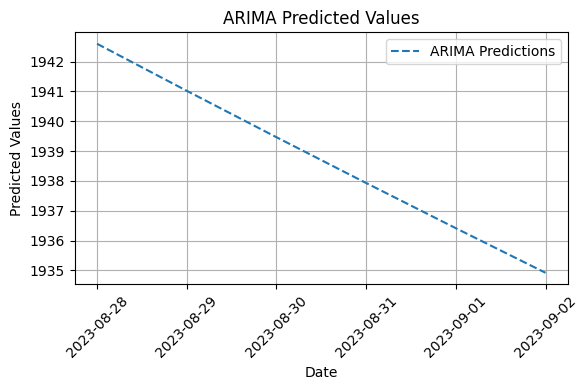

In [217]:

# Plotting the forecasted series
plt.figure(figsize=(6,4))
plt.plot(pred_series.index, pred_series.values, label='ARIMA Predictions', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Predicted Values')
plt.title('ARIMA Predicted Values')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('Huma arima forecasting fina;')
plt.show()

In [218]:
predicted_arima

2000-08-30    273.90
2000-08-31    278.30
2000-09-01    277.00
2000-09-05    275.80
2000-09-06    274.20
               ...  
2023-08-29   1941.02
2023-08-30   1939.47
2023-08-31   1937.93
2023-09-01   1936.41
2023-09-02   1934.92
Length: 5774, dtype: float64

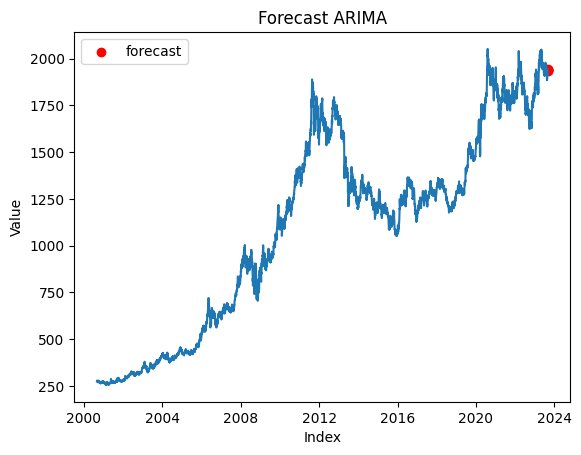

In [219]:
plt.plot(predicted_arima[:-6])

# Getting the index of the last three points
last_three_indices = predicted_arima.index[-6:]

# Adding red data points for the last three index points
plt.scatter(last_three_indices, predicted_arima[last_three_indices], color='red', label='forecast')

plt.title('Forecast ARIMA')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.savefig('arima forecasting')
plt.show()

# Data import at daily interval for GRU and LSTM

## Importing the dataset

In [220]:
import yfinance as yf

# Define the ticker symbol for crude oil
ticker_symbol = "GC=F"

# Set the start and end date for the data
date_start = "1950-01-01"
data_end = "2023-08-26"

# Fetch the data from Yahoo Finance
gold_data = yf.download(ticker_symbol,   period='max',  interval='1d')
new_index = gold_data.index.strftime('%Y-%m-%d')
gold_data.index = new_index
gold_data.index.name = 'Date'
gold_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-08-30,273.90,273.90,273.90,273.90,273.90,0
2000-08-31,274.80,278.30,274.80,278.30,278.30,0
2000-09-01,277.00,277.00,277.00,277.00,277.00,0
2000-09-05,275.80,275.80,275.80,275.80,275.80,2
2000-09-06,274.20,274.20,274.20,274.20,274.20,0
...,...,...,...,...,...,...
2023-08-22,1894.60,1896.80,1892.80,1896.40,1896.40,46
2023-08-23,1909.60,1918.50,1909.60,1918.50,1918.50,547
2023-08-24,1920.00,1920.80,1918.20,1918.20,1918.20,337


## Data preprocessing

In [221]:
from statsmodels.tsa.arima.model import ARIMA
# Define the sizes of training, testing, and validation sets
train_size = int(len(gold_data) * 0.90)  # 98% of the data for training
test_size = int(len(gold_data) * 0.05)   # 1% of the data for testing
val_size = len(gold_data) - train_size - test_size  # Remaining for validation

# Split the data into training, testing, and validation sets
train = gold_data.iloc[:train_size]
validation = gold_data.iloc[train_size: train_size + val_size]
test = gold_data.iloc[train_size + val_size:]

# Print the shapes of the split sets
print(train.shape, test.shape, validation.shape)

(5191, 6) (288, 6) (289, 6)


In [222]:
train_data = train.filter(['Close'])
train_set = train_data.values
test_data = test.filter(['Close'])
test_set = test_data.values
validation_data = validation.filter(['Close'])
validation_set = validation_data.values
train_set.shape,test_set.shape,validation_set.shape

((5191, 1), (288, 1), (289, 1))

In [223]:
from sklearn.preprocessing import MinMaxScaler
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()
# Scale the training dataset
Scaled_training_data = scaler.fit_transform(train_set)
Scaled_validation_data = scaler.fit_transform(validation_set)
Scaled_test_data = scaler.fit_transform(test_set)

In [224]:
step_count = 20
X_train = []
y_train = []
for i in range(len(train)-step_count):
    X_train.append(Scaled_training_data[i:i+step_count,0])
    y_train.append(Scaled_training_data[step_count+i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
# Convert the lists to NumPy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
# Reshape the input data to match the LSTM input shape [samples, timesteps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train=y_train.reshape(y_train.shape[0],1)
print(X_train.shape,y_train.shape)

(5171, 20, 1) (5171, 1)


In [225]:
X_Val = []
y_Val = []
for i in range(len(validation)-step_count):
    X_Val.append(Scaled_validation_data[i:i+step_count,0])
    y_Val.append(Scaled_validation_data[step_count+i,0])
X_Val, y_Val = np.array(X_Val), np.array(y_Val)
# Convert the lists to NumPy arrays
X_Val = np.array(X_Val)
y_Val = np.array(y_Val)
# Reshape the input data to match the LSTM input shape [samples, timesteps, features]
y_Val=y_Val.reshape(y_Val.shape[0],1)
X_Val = np.reshape(X_Val, (X_Val.shape[0], X_Val.shape[1], 1))
print(X_Val.shape, y_Val.shape)

(269, 20, 1) (269, 1)


In [226]:
X_test = []
y_test = []
for i in range(len(test)-step_count):
    X_test.append(Scaled_test_data[i:i+step_count,0])
    y_test.append(Scaled_test_data[step_count+i,0])
X_test, y_test = np.array(X_test), np.array(y_test)
# Convert the lists to NumPy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)
y_test=y_test.reshape(y_test.shape[0],1)
# Reshape the input data to match the LSTM input shape [samples, timesteps, features]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape, y_test.shape)

(268, 20, 1) (268, 1)


# GRU

## Model Fitting

In [227]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

Epoch 1/20
146/146 [==============================] - 23s 104ms/step - loss: 0.0173 - val_loss: 2.8120e-04
Epoch 2/20
146/146 [==============================] - 17s 115ms/step - loss: 9.7718e-05 - val_loss: 2.3773e-04
Epoch 3/20
146/146 [==============================] - 16s 109ms/step - loss: 8.6176e-05 - val_loss: 2.0146e-04
Epoch 4/20
146/146 [==============================] - 15s 101ms/step - loss: 7.9372e-05 - val_loss: 1.8443e-04
Epoch 5/20
146/146 [==============================] - 15s 102ms/step - loss: 7.4892e-05 - val_loss: 1.7526e-04
Epoch 6/20
146/146 [==============================] - 15s 101ms/step - loss: 7.0076e-05 - val_loss: 1.7458e-04
Epoch 7/20
146/146 [==============================] - 15s 100ms/step - loss: 6.7175e-05 - val_loss: 1.6614e-04
Epoch 8/20
146/146 [==============================] - 15s 100ms/step - loss: 6.3721e-05 - val_loss: 1.5436e-04
Epoch 9/20
146/146 [==============================] - 16s 107ms/step - loss: 6.4906e-05 - val_loss: 1.5275e-04
Epoch

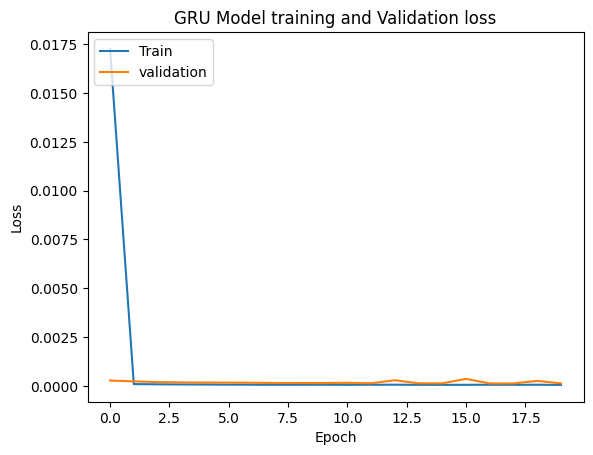

In [228]:
model_GRU = Sequential()
model_GRU.add(GRU(units=64, activation='relu', return_sequences=True, input_shape=(step_count, 1)))
model_GRU.add(GRU(units=64, activation='relu', return_sequences=False))
model_GRU.add(Dense(units=1))
model_GRU.compile(optimizer='adam', loss='mean_squared_error')
GRU_model = model_GRU.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)
plt.plot(GRU_model.history['loss'])
plt.plot(GRU_model.history['val_loss'])
plt.title('GRU Model training and Validation loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'validation'], loc='upper left')
plt.savefig('GRU_Model-Loss.png' )
plt.show()

## GRU Model Validation

In [229]:
predictions = model_GRU.predict(X_Val)
predictions_original_scale = scaler.inverse_transform(predictions)
y_Val_original_scale = scaler.inverse_transform(y_Val)

9/9 [==============================] - 0s 9ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

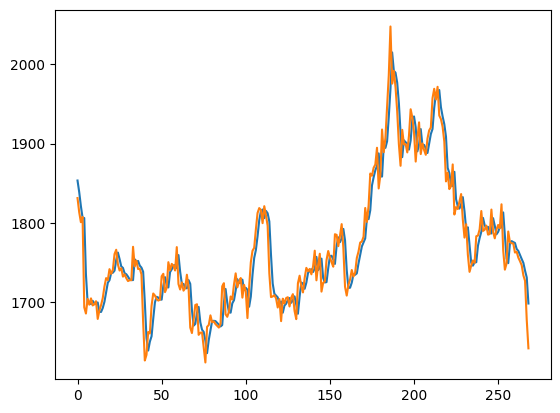

In [230]:
plt.plot(predictions_original_scale)
plt.plot(y_Val_original_scale)
plt.show

In [231]:
mape = mean_absolute_percentage_error(y_Val_original_scale, predictions_original_scale)
mse = mean_square_error(y_Val_original_scale, predictions_original_scale)
rmse = root_mean_square_error(y_Val_original_scale, predictions_original_scale)
print('Validation phase model performance')
print("RMSE:", rmse)
print("MSE:", mse)
print("MAPE:", mape)

Validation phase model performance
RMSE: 24.451504496586693
MSE: 597.8760721465993
MAPE: 1.0082961682574338


## GRU Model Testing

In [232]:
predictions = model_GRU.predict(X_test)
predictions_original_scale = scaler.inverse_transform(predictions)
y_test_original_scale = scaler.inverse_transform(y_test)

9/9 [==============================] - 0s 13ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

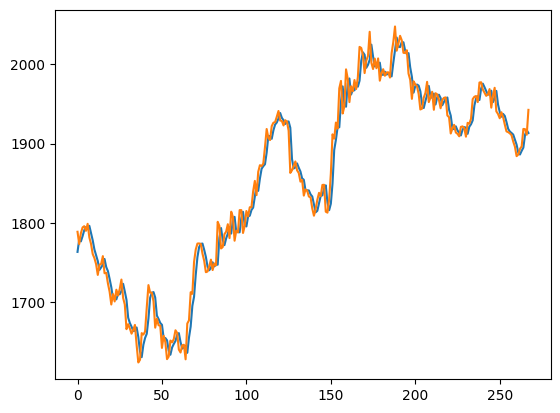

In [233]:
plt.plot(predictions_original_scale)
plt.plot(y_test_original_scale)
plt.show

In [234]:
mape = mean_absolute_percentage_error(y_test_original_scale, predictions_original_scale)
mse = mean_square_error(y_test_original_scale, predictions_original_scale)
rmse = root_mean_square_error(y_test_original_scale, predictions_original_scale)
print('Testing phase model performance')
print("RMSE:", rmse)
print("MSE:", mse)
print("MAPE:", mape)

Testing phase model performance
RMSE: 17.17325967729979
MSE: 294.92084794397084
MAPE: 0.7106450297643273


## Future Prediction

In [235]:
predictions = []
train_data_full = gold_data.filter(['Close'])
Scaled_train_data_full = scaler.fit_transform(train_data_full)
X_train = []
y_train = []
for i in range(len(Scaled_train_data_full)-step_count):
    X_train.append(Scaled_train_data_full[i:i+step_count,0])
    y_train.append(Scaled_train_data_full[step_count+i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train=y_train.reshape(y_train.shape[0],1)
print(X_train.shape,y_train.shape)

current_window = X_train[-step_count:]
num_predictions = 10
next_10_days =[]
for i in range(num_predictions):
    predicted_value = model_GRU.predict(current_window)
    predictions.append(predicted_value[0, 0])
    current_window = np.roll(current_window, -1)
    current_window[-1] = predicted_value
    next_10_days.append(pd.Timestamp(train_data_full.index[-1]) + pd.DateOffset(days=i+1))
next_10_days = pd.DatetimeIndex(next_10_days)
next_10_days = pd.Index([date.date() for date in next_10_days])
predictions_original_scale = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
forecasting_10days_data = pd.DataFrame(predictions_original_scale, index=next_10_days, columns =['Close'])
pred_train= pd.concat([train_data_full,forecasting_10days_data])

(5748, 20, 1) (5748, 1)
1/1 [==============================] - 0s 40ms/step


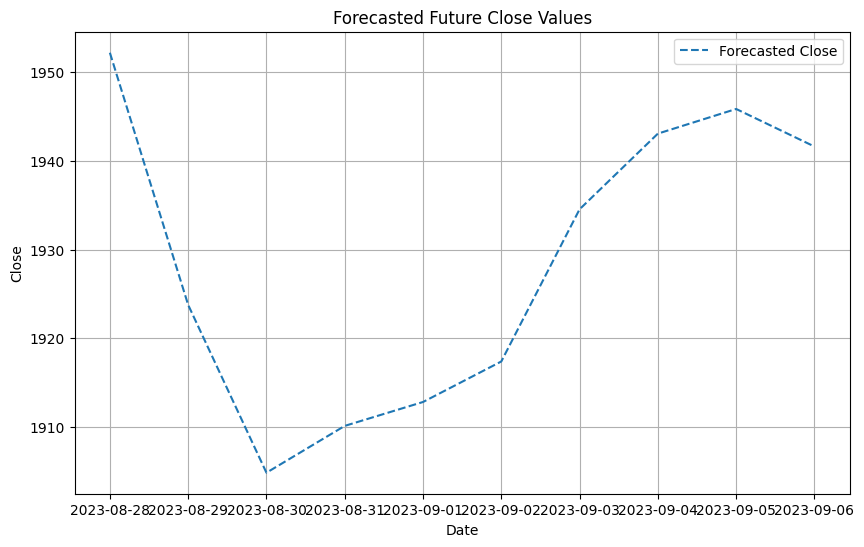

In [243]:
# Plotting the forecasted values
plt.figure(figsize=(10,6))
plt.plot(forecasting_10days_data.index, forecasting_10days_data['Close'], label='Forecasted Close', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Forecasted Future Close Values')
plt.legend()
plt.grid(True)
plt.savefig('forecasting')
plt.show()

In [237]:
forecasting_10days_data

,Close
2023-08-28,1952.20
2023-08-29,1923.77
2023-08-30,1904.85
2023-08-31,1910.13
2023-09-01,1912.83
2023-09-02,1917.39
2023-09-03,1934.55
2023-09-04,1943.08
2023-09-05,1945.86
2023-09-06,1941.63


In [238]:
pred_train

,Close
2000-08-30,273.90
2000-08-31,278.30
2000-09-01,277.00
2000-09-05,275.80
2000-09-06,274.20
...,...
2023-09-02,1917.39
2023-09-03,1934.55
2023-09-04,1943.08
2023-09-05,1945.86


<Axes: >

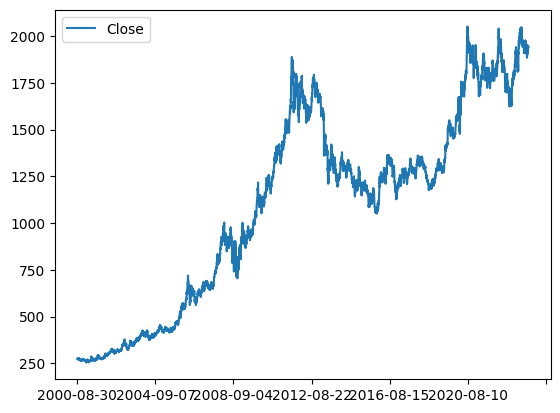

In [239]:
pred_train.plot()

# FB PROPHET MODEL

In [244]:
from datetime import datetime
import numpy as np
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#import plotly_express as px
warnings.filterwarnings('ignore')

In [245]:
import yfinance as yf

# Define the ticker symbol for gold
gold_ticker = "GC=F"  # This is the ticker symbol for gold futures on Yahoo Finance

# Fetch historical data for gold
dfg = yf.download(gold_ticker, start="1950-01-01", end="2023-08-31")

# Print the fetched data
print(dfg)


[*********************100%%**********************]  1 of 1 completed
              Open    High     Low   Close  Adj Close  Volume
Date                                                         
2000-08-30  273.90  273.90  273.90  273.90     273.90       0
2000-08-31  274.80  278.30  274.80  278.30     278.30       0
2000-09-01  277.00  277.00  277.00  277.00     277.00       0
2000-09-05  275.80  275.80  275.80  275.80     275.80       2
2000-09-06  274.20  274.20  274.20  274.20     274.20       0
...            ...     ...     ...     ...        ...     ...
2023-08-22 1894.60 1896.80 1892.80 1896.40    1896.40      46
2023-08-23 1909.60 1918.50 1909.60 1918.50    1918.50     547
2023-08-24 1920.00 1920.80 1918.20 1918.20    1918.20     337
2023-08-25 1919.80 1919.80 1911.10 1911.10    1911.10     337
2023-08-27 1944.00 1944.40 1942.30 1942.70    1942.70    1193

[5768 rows x 6 columns]


In [246]:
dfg = dfg.reset_index()
dfg
dfg['Date'] = pd.to_datetime(dfg['Date'])

In [247]:
dfg["Date"]=pd.to_datetime(dfg["Date"])
dfg_close=dfg[["Date","Close"]]

In [248]:
dfg.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5768.00,5768.00,5768.00,5768.00,5768.00,5768.00
mean,1095.52,1100.99,1089.73,1095.43,1095.43,4301.16
std,524.22,527.18,521.06,524.16,524.16,24460.56
min,255.00,256.10,255.00,255.10,255.10,0.00
25%,597.65,603.00,597.22,597.68,597.68,20.00
50%,1214.45,1220.50,1208.00,1214.45,1214.45,103.00
75%,1499.93,1507.35,1490.38,1499.55,1499.55,393.25
max,2053.60,2072.00,2040.00,2051.50,2051.50,386334.00


In [249]:
def info_dataset(dataframe):
    print("Top 5 of Dataset", dataframe.head(),
          sep='\n', end = '\n\n')
    print(f"Total number of rows : {dataframe.shape[0]}",
          sep='\n', end = '\n\n')
    print(f"Total number of columns: {dataframe.shape[1]}",
          sep='\n', end = '\n\n')
    print("Total number of missing values",dataframe.isnull().sum(),
          sep='\n', end = '\n\n')
    print("Types of variables", dataframe.dtypes,
          sep='\n', end = '\n\n')
info_dataset(dfg_close)

Top 5 of Dataset
        Date  Close
0 2000-08-30 273.90
1 2000-08-31 278.30
2 2000-09-01 277.00
3 2000-09-05 275.80
4 2000-09-06 274.20

Total number of rows : 5768

Total number of columns: 2

Total number of missing values
Date     0
Close    0
dtype: int64

Types of variables
Date     datetime64[ns]
Close           float64
dtype: object



In [250]:
dfg_close=dfg_close.set_index("Date")
dfg_close['Day'] = dfg_close.index.day
dfg_close['Month'] = dfg_close.index.month
dfg_close['Year'] = dfg_close.index.year
dfg_close.head()

,Close,Day,Month,Year
Date,,,,
2000-08-30,273.90,30,8,2000
2000-08-31,278.30,31,8,2000
2000-09-01,277.00,1,9,2000
2000-09-05,275.80,5,9,2000
2000-09-06,274.20,6,9,2000


In [251]:
import calendar
dfg_close['Month'] = dfg_close['Month'].apply(lambda x: calendar.month_abbr[x])

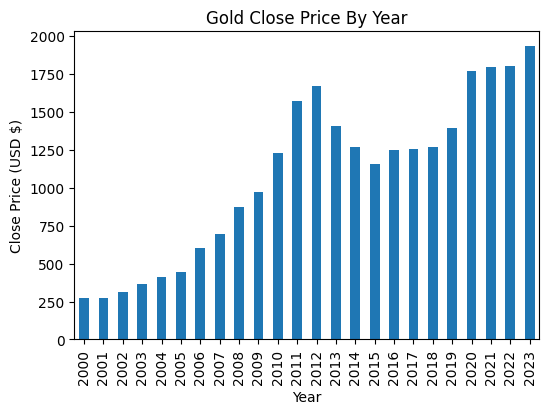

In [252]:
plt.figure(figsize=(6,4))
dfg_close.groupby('Year')['Close'].mean().plot(kind='bar')
plt.title("Gold Close Price By Year")
plt.ylabel("Close Price (USD $)")
plt.savefig('bar plot')
plt.show()

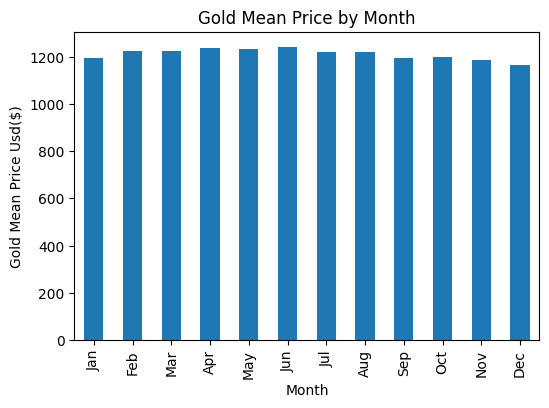

In [253]:
plt.figure(figsize=(6,4))
dfg_close.groupby('Month')['Close'].median().reindex(index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']).plot(kind='bar')
plt.title("Gold Mean Price by Month")
plt.ylabel("Gold Mean Price Usd($)")
plt.show()

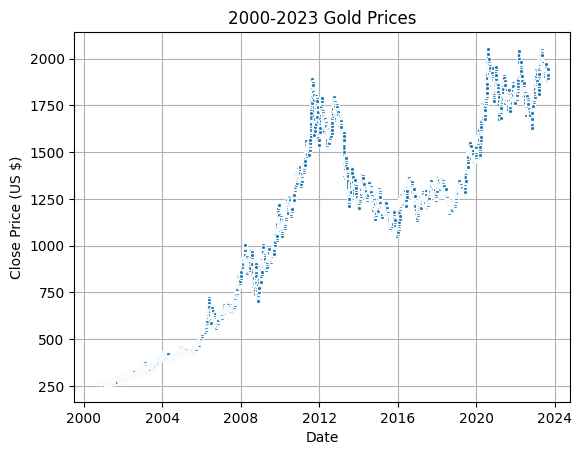

In [254]:
sns.lineplot(data=dfg_close,x="Date",y="Close", marker=".")
plt.title("2000-2023 Gold Prices")
plt.ylabel("Close Price (US $)")
plt.grid()
plt.show()

In [255]:
!pip install prophet

In [256]:
from prophet import Prophet

In [257]:
# converting data to expected format
data = dfg_close.rename(columns={'Date': 'ds', 'Close': 'y'})
data = data.reset_index()
data = data[["Date","y"]]
data = data.rename(columns={'Date': 'ds'})
data.head()

,ds,y
0,2000-08-30,273.90
1,2000-08-31,278.30
2,2000-09-01,277.00
3,2000-09-05,275.80
4,2000-09-06,274.20


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3oj5s013/2muic1dv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3oj5s013/cx7jwxso.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89642', 'data', 'file=/tmp/tmp3oj5s013/2muic1dv.json', 'init=/tmp/tmp3oj5s013/cx7jwxso.json', 'output', 'file=/tmp/tmp3oj5s013/prophet_model8a8segy_/prophet_model-20230827231755.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:17:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:17:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


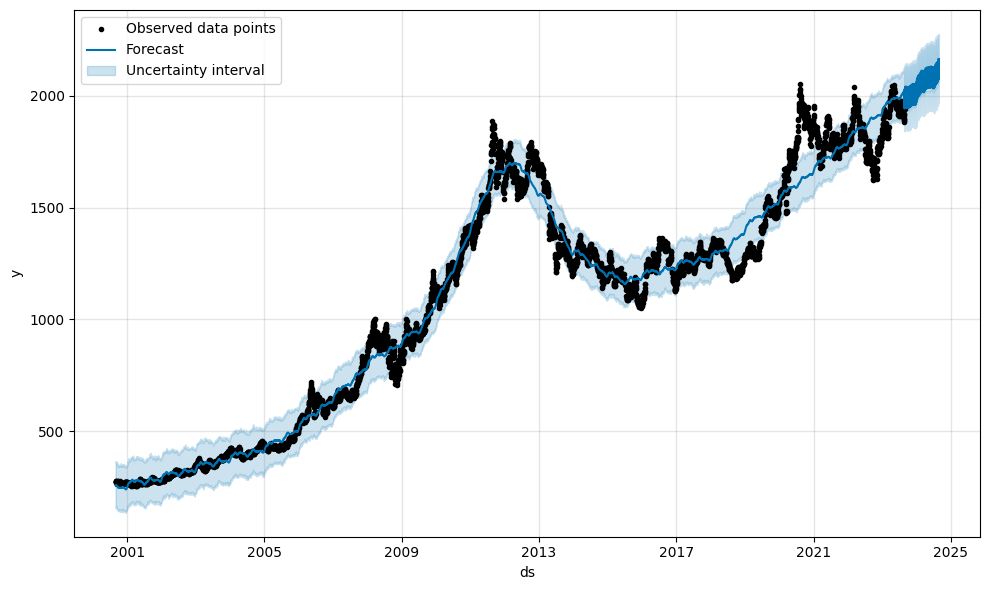

In [260]:
model = Prophet()
model.fit(data)
future = model.make_future_dataframe(periods=365)  # for 1 Years Prediction
forecast = model.predict(future)
fig = model.plot(forecast)
plt.legend()
plt.savefig('forecasting value')
plt.show()

In [261]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-08-30,236.95,164.02,366.05,236.95,236.95,20.59,20.59,20.59,11.54,11.54,11.54,9.05,9.05,9.05,0.00,0.00,0.00,257.54
1,2000-08-31,237.05,156.34,360.18,237.05,237.05,20.83,20.83,20.83,11.48,11.48,11.48,9.35,9.35,9.35,0.00,0.00,0.00,257.88
2,2000-09-01,237.14,162.70,362.92,237.14,237.14,20.11,20.11,20.11,10.55,10.55,10.55,9.56,9.56,9.56,0.00,0.00,0.00,257.25
3,2000-09-05,237.52,165.19,361.36,237.52,237.52,20.72,20.72,20.72,11.22,11.22,11.22,9.50,9.50,9.50,0.00,0.00,0.00,258.24
4,2000-09-06,237.61,161.00,365.77,237.61,237.61,20.80,20.80,20.80,11.54,11.54,11.54,9.26,9.26,9.26,0.00,0.00,0.00,258.41


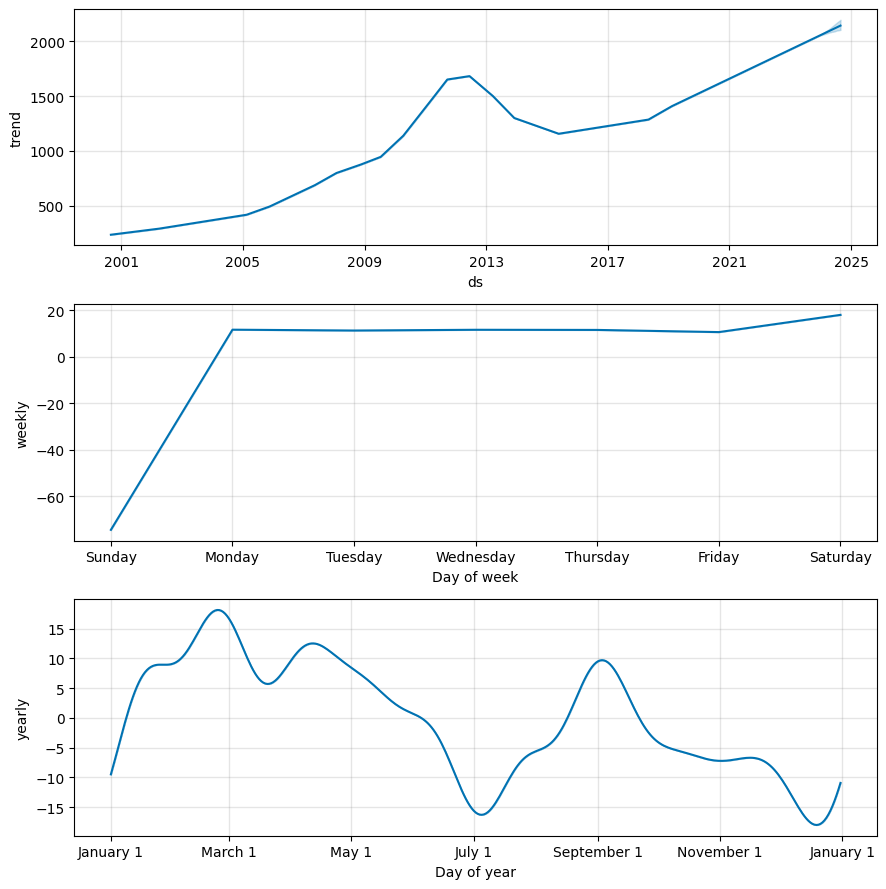

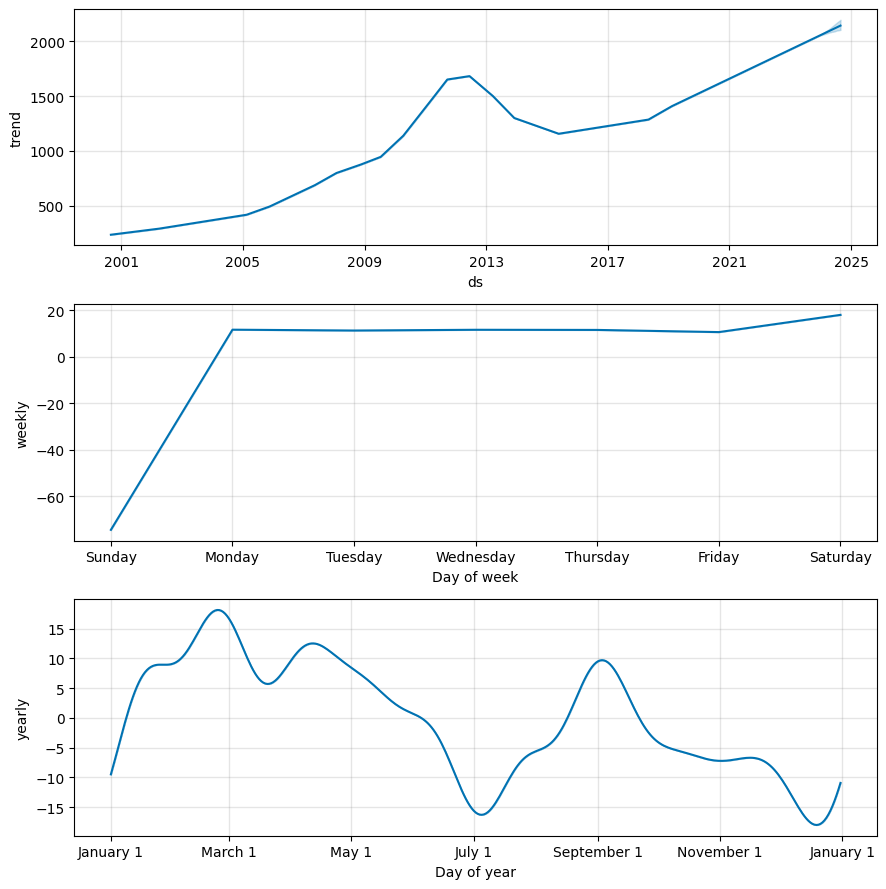

In [262]:
model.plot_components(forecast)

In [263]:
b1= forecast[["ds","yhat"]]
b2=dfg_close["Close"].reset_index()

frames = [b1,b2]
result = pd.concat(frames,axis=1)
result.head()

,ds,yhat,Date,Close
0,2000-08-30,257.54,2000-08-30,273.90
1,2000-08-31,257.88,2000-08-31,278.30
2,2000-09-01,257.25,2000-09-01,277.00
3,2000-09-05,258.24,2000-09-05,275.80
4,2000-09-06,258.41,2000-09-06,274.20


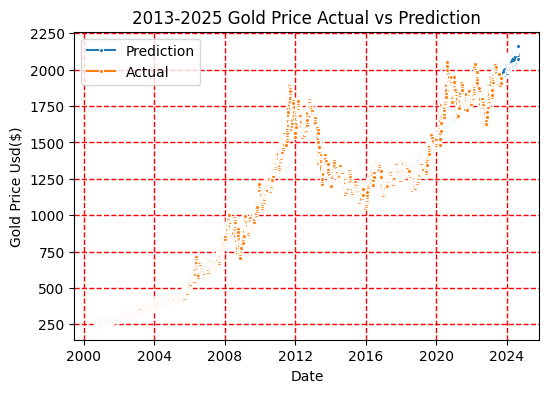

In [264]:
plt.figure(figsize=(6,4))
sns.lineplot(data = result,x="ds",y="yhat",label="Prediction", marker = ".")
sns.lineplot(data = result,x="ds",y="Close",label="Actual",marker = ".")
plt.title("2013-2025 Gold Price Actual vs Prediction")
plt.xlabel("Date")
plt.ylabel("Gold Price Usd($)")
plt.grid(color='r', linestyle='--', linewidth=1)
plt.legend()
plt.show()

In [265]:
mse = np.mean((result['Close'] - result['yhat']) ** 2)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((result['Close'] - result['yhat']) / result['Close'])) * 100

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Squared Error (MSE): 6166.86
Root Mean Squared Error (RMSE): 78.53
Mean Absolute Percentage Error (MAPE): 4.77%


## CNN MODEL

In [1]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## setting the start and end date
start_date = '1950-01-01'
end_date = '2023-08-25'
ticker = 'GC=F'
## fetching data from yahoo
df = yf.download(ticker,start=start_date, end=end_date)
print(df)

[*********************100%%**********************]  1 of 1 completed
                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2000-08-30   273.899994   273.899994   273.899994   273.899994   273.899994   
2000-08-31   274.799988   278.299988   274.799988   278.299988   278.299988   
2000-09-01   277.000000   277.000000   277.000000   277.000000   277.000000   
2000-09-05   275.799988   275.799988   275.799988   275.799988   275.799988   
2000-09-06   274.200012   274.200012   274.200012   274.200012   274.200012   
...                 ...          ...          ...          ...          ...   
2023-08-18  1891.800049  1891.800049  1886.099976  1886.099976  1886.099976   
2023-08-21  1893.599976  1893.599976  1893.300049  1893.300049  1893.300049   
2023-08-22  1894.599976  1896.800049  1892.800049  1896.400024  1896.400024   
2023-08-23  1909.599976  1918.500000  1909.599976  1918.500000

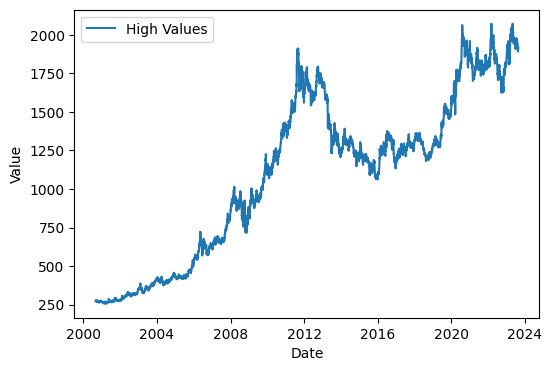

In [3]:
plt.figure(figsize=(6, 4))
plt.xlabel('Date')
plt.ylabel('Value')
plt.plot(df['High'], label='High Values')
plt.legend()
plt.savefig('NAKSHATRA')
plt.show()

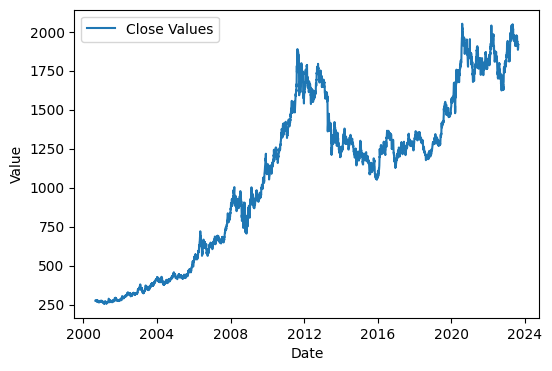

In [4]:
plt.figure(figsize=(6, 4))
plt.xlabel('Date')
plt.ylabel('Value')
plt.plot(df['Close'], label='Close Values')
plt.legend()
plt.savefig('price')
plt.show()

In [5]:
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0
3,2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2
4,2000-09-06,274.200012,274.200012,274.200012,274.200012,274.200012,0
...,...,...,...,...,...,...,...
5761,2023-08-18,1891.800049,1891.800049,1886.099976,1886.099976,1886.099976,19
5762,2023-08-21,1893.599976,1893.599976,1893.300049,1893.300049,1893.300049,876
5763,2023-08-22,1894.599976,1896.800049,1892.800049,1896.400024,1896.400024,46
5764,2023-08-23,1909.599976,1918.500000,1909.599976,1918.500000,1918.500000,547


<ipython-input-6-d2cca78dbd2c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)


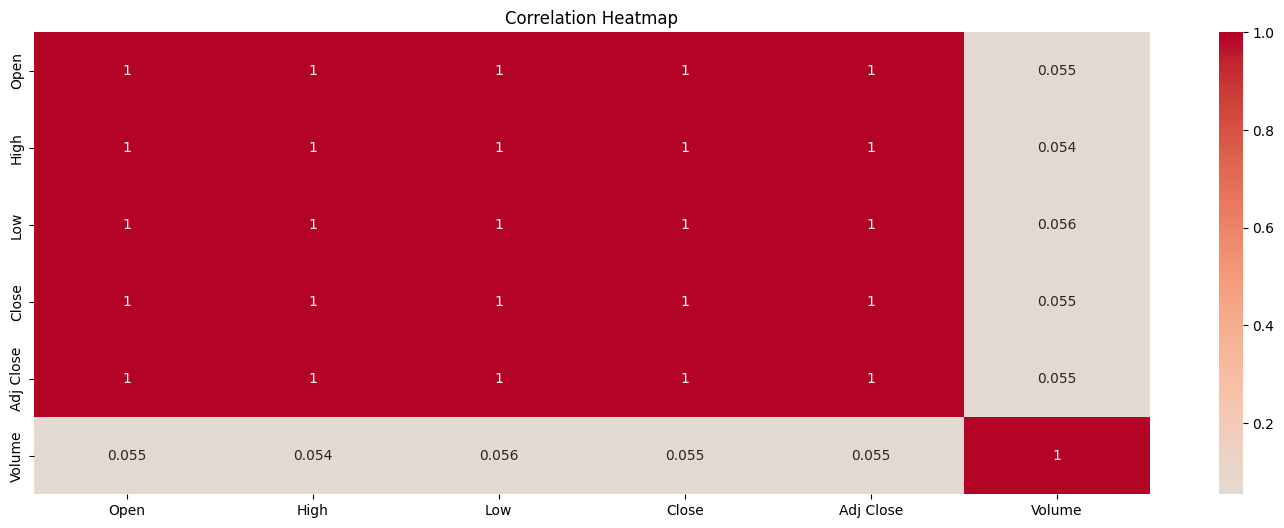

In [6]:
# Create a heatmap
plt.figure(figsize=(18, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.savefig('heatmap')
plt.show()

In [7]:
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred):

    #Parameters:
    # y_true (array-like): The ground truth (actual) values.
    # y_pred (array-like): The predicted values.


    return mean_absolute_error(y_true, y_pred) / np.mean(y_true) * 100

In [8]:
from sklearn.metrics import mean_squared_error

def mean_square_error(y_true, y_pred):
   # y_true (array-like): The ground truth (actual) values.
   #  y_pred (array-like): The predicted values.



    return mean_squared_error(y_true, y_pred)

In [9]:
import math
def root_mean_square_error(y_true, y_pred):
    RMSE_Value = math.sqrt(mean_squared_error(y_true, y_pred))
    return RMSE_Value

In [10]:
# Define the size of the training set
train_size = int(len(df) * 0.98)  # 98% of the data for training

# Split the data into training and testing sets
train = df.iloc[:train_size]
test = df.iloc[train_size:]

# Print the shapes of the split sets
print(train.shape, test.shape)

(5650, 7) (116, 7)


In [11]:
training_data = train.filter(['Close'])
training_set = training_data.values
testing_data = test.filter(['Close'])
testing_set = testing_data.values
print(training_set.shape, testing_set.shape)

(5650, 1) (116, 1)


In [12]:
from sklearn.preprocessing import MinMaxScaler
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()
# Scale the training dataset
scaled_training_set = scaler.fit_transform(training_set)
# Scale the test dataset using the same scaler
scaled_testing_set = scaler.transform(testing_set)

print(scaled_training_set.shape, scaled_testing_set.shape)

(5650, 1) (116, 1)


In [13]:
step_count = 50
X_train = []
y_train = []

for i in range(len(train) - step_count):
    X_train.append(scaled_training_set[i:i + step_count, 0])
    y_train.append(scaled_training_set[step_count + i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the input data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]))
y_train = y_train.reshape(y_train.shape[0])

print(X_train.shape, y_train.shape)


(5600, 50) (5600,)


In [14]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Define the CNN model
cnn_model = Sequential()

# Add a 1D convolutional layer with 32 filters, kernel size 3, and ReLU activation
cnn_model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add a max pooling layer with pool size 2
cnn_model.add(MaxPooling1D(pool_size=2))

# Flatten the output from the previous layer
cnn_model.add(Flatten())

# Add a fully connected dense layer with 64 units and ReLU activation
cnn_model.add(Dense(64, activation='relu'))

# Add a final dense layer with 1 unit and linear activation for regression
cnn_model.add(Dense(1, activation='linear'))

# Compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
cnn_model.summary()

#compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 48, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 24, 32)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 dense (Dense)               (None, 64)                49216     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 49,409
Trainable params: 49,409
Non-trainable params: 0
____________________________________________________

In [15]:
#train the model
history = cnn_model.fit(X_train, y_train, batch_size=16, epochs=20)

Epoch 1/20
350/350 [==============================] - 12s 3ms/step - loss: 0.0024
Epoch 2/20
350/350 [==============================] - 1s 3ms/step - loss: 5.3211e-04
Epoch 3/20
350/350 [==============================] - 1s 3ms/step - loss: 4.0226e-04
Epoch 4/20
350/350 [==============================] - 1s 3ms/step - loss: 3.6472e-04
Epoch 5/20
350/350 [==============================] - 1s 3ms/step - loss: 3.2426e-04
Epoch 6/20
350/350 [==============================] - 1s 4ms/step - loss: 2.4499e-04
Epoch 7/20
350/350 [==============================] - 1s 3ms/step - loss: 2.3487e-04
Epoch 8/20
350/350 [==============================] - 1s 3ms/step - loss: 2.0557e-04
Epoch 9/20
350/350 [==============================] - 1s 3ms/step - loss: 1.9159e-04
Epoch 10/20
350/350 [==============================] - 1s 3ms/step - loss: 1.6783e-04
Epoch 11/20
350/350 [==============================] - 1s 3ms/step - loss: 1.5952e-04
Epoch 12/20
350/350 [==============================] - 1s 3ms/step

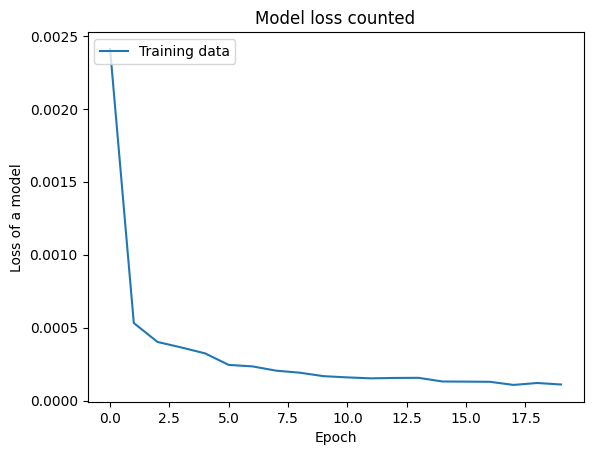

In [16]:
#show model loss
plt.plot(history.history['loss'])
plt.title('Model loss counted')
plt.ylabel('Loss of a model')
plt.xlabel('Epoch')
plt.legend(['Training data'], loc='upper left')
plt.show()

In [17]:
X_test = []
y_test = []

for i in range(len(test) - step_count):
    X_test.append(scaled_testing_set[i:i + step_count, 0])
    y_test.append(scaled_testing_set[step_count + i, 0])

X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape the input data to match the LSTM input shape [samples, timesteps, features]
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]))
y_test = y_test.reshape(y_test.shape[0])

print(X_test.shape, y_test.shape)

(66, 50) (66,)


In [18]:
#train the model
history = cnn_model.fit(X_test, y_test, batch_size=16, epochs=20)

Epoch 1/20
5/5 [==============================] - 1s 26ms/step - loss: 1.1756e-04
Epoch 2/20
5/5 [==============================] - 0s 7ms/step - loss: 1.9316e-04
Epoch 3/20
5/5 [==============================] - 0s 7ms/step - loss: 1.1810e-04
Epoch 4/20
5/5 [==============================] - 0s 6ms/step - loss: 6.3253e-05
Epoch 5/20
5/5 [==============================] - 0s 8ms/step - loss: 1.7348e-04
Epoch 6/20
5/5 [==============================] - 0s 7ms/step - loss: 1.1217e-04
Epoch 7/20
5/5 [==============================] - 0s 6ms/step - loss: 1.3463e-04
Epoch 8/20
5/5 [==============================] - 0s 7ms/step - loss: 8.5320e-05
Epoch 9/20
5/5 [==============================] - 0s 6ms/step - loss: 1.4795e-04
Epoch 10/20
5/5 [==============================] - 0s 7ms/step - loss: 1.3446e-04
Epoch 11/20
5/5 [==============================] - 0s 8ms/step - loss: 7.5585e-05
Epoch 12/20
5/5 [==============================] - 0s 5ms/step - loss: 1.1193e-04
Epoch 13/20
5/5 [=======

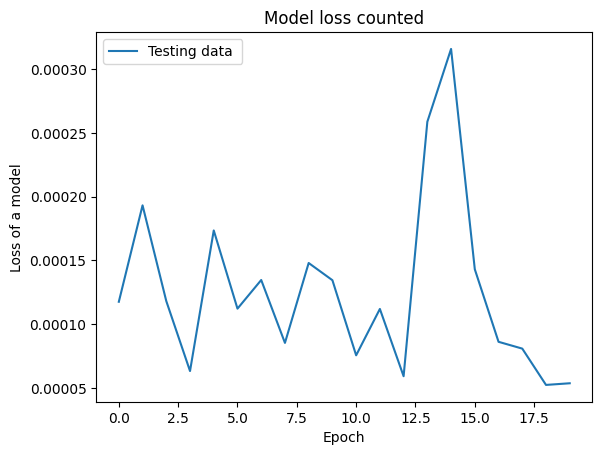

In [19]:
#show model loss
plt.plot(history.history['loss'])
plt.title('Model loss counted')
plt.ylabel('Loss of a model')
plt.xlabel('Epoch')
plt.legend(['Testing data '], loc='upper left')
plt.show()

In [20]:
predict = cnn_model.predict(X_test)
predict_original_scale = predict * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]
y_test_original = y_test * (scaler.data_max_[0] - scaler.data_min_[0]) + scaler.data_min_[0]

3/3 [==============================] - 1s 5ms/step


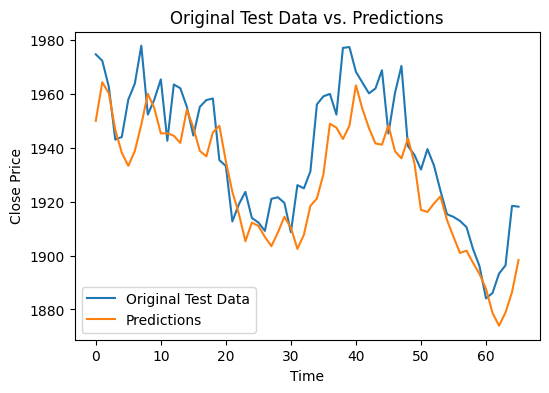

In [21]:
plt.figure(figsize=(6, 4))

# Plot original test data
plt.plot(y_test_original, label='Original Test Data')

# Plot predicted data
plt.plot(predict_original_scale, label='Predictions')

plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('Original Test Data vs. Predictions')
plt.legend()
plt.savefig('nakshatra test and actual prediction')
plt.show()

In [22]:
mape = mean_absolute_percentage_error(y_test_original, predict_original_scale)
mse = mean_square_error(y_test_original, predict_original_scale)
rmse = root_mean_square_error(y_test_original, predict_original_scale)
print(' model performance')
print("RMSE:", rmse)
print("MSE:", mse)
print("MAPE:", mape)

 model performance
RMSE: 16.48506580005418
MSE: 271.7573944321159
MAPE: 0.6804008888927343


In [24]:
import datetime


# Assuming 'last_date' is defined properly
# Define the number of days for the next 7 days
days_in_future = 10

import pandas as pd

# Assuming 'data_M' is a DataFrame with a 'Date' column containing dates
# Convert the last date to a pandas Timestamp object
last_date = pd.to_datetime(df['Date'].iat[-1])

# Generate the list of dates for forecast of crude oil prices for  the next 7 days
next_10_days = [last_date + datetime.timedelta(days=i) for i in range(1, days_in_future + 1)]

# Assuming 'next_7_days' and 'predicted_stock_price' are defined properly

# Print the predicted prices for the next 31 days
for date, price in zip(next_10_days[:10], predict_original_scale[:10]):
    print(f"{date.date()}: {price}")

2023-08-25: [1950.0854]
2023-08-26: [1964.443]
2023-08-27: [1960.3716]
2023-08-28: [1946.7264]
2023-08-29: [1938.2274]
2023-08-30: [1933.3553]
2023-08-31: [1938.8909]
2023-09-01: [1948.6759]
2023-09-02: [1960.1349]
2023-09-03: [1954.798]


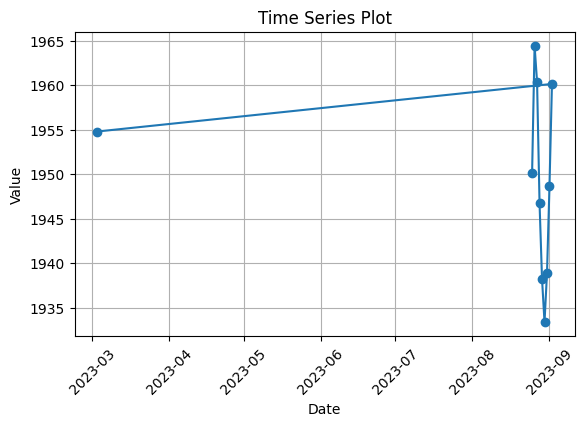

In [25]:
import matplotlib.pyplot as plt
import datetime

# Data
dates = [
    '2023-08-25',
    '2023-08-26',
    '2023-08-27',
    '2023-08-28',
    '2023-08-29',
    '2023-08-30',
    '2023-08-31',
    '2023-09-01',
    '2023-09-02',
    '2023-03-03'
]

values = [
    1950.085,
    1964.44,
    1960.3716,
    1946.72,
    1938.22,
    1933.35,
    1938.89,
    1948.67,
    1960.134,
    1954.79
]

# Convert dates to datetime objects
dates = [datetime.datetime.strptime(date, "%Y-%m-%d") for date in dates]

# Create a time series plot
plt.figure(figsize=(6, 4))
plt.plot(dates, values, marker='o')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot')

# Display the plot
plt.tight_layout()
plt.xticks(rotation=45)
plt.grid(True)
plt.savefig('mishtha forecasting')
plt.show()